In [1]:
%matplotlib inline
import pandas as pd

In [2]:
data = pd.DataFrame.from_csv('./mode-report-run-5bbb05c4cff9.csv', index_col=None)

Here are a few questions that come to my mind:

    1) See which cuisines are the most/least popular
    2) Any correlation between knowledge of international food (or interest) with income/education?
    3) What about any geographical connection? Do Pacific people like Chineese more?
    4) Any age/gender trend?

In [326]:
df.head()

,respondent_id,knowledge_level_of_international_food,interested_in_international_foods,algeria,argentina,australia,belgium,bosnia_and_herzegovina,brazil,cameroon,...,turkey,cuba,ethiopia,vietnam,ireland,gender,age,household_income,education,census_region_location
0,3308895255,Intermediate,Some,NaN,3,5,4,NaN,3,NaN,...,NaN,NaN,3,NaN,4,Male,18-29,"$100,000 - $149,999",Less than high school degree,West South Central
1,3308891308,Novice,Some,NaN,NaN,3,3,NaN,3,NaN,...,NaN,NaN,NaN,NaN,4,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West South Central
2,3308891135,Intermediate,A lot,3,4,NaN,3,NaN,4,5,...,NaN,4,5,4,3,Male,30-44,"$50,000 - $99,999",Graduate degree,Pacific
3,3308879091,Novice,Not much���,NaN,3,NaN,3,NaN,NaN,3,...,3,4,NaN,4,3,Male,45-60,"$0 - $24,999",Less than high school degree,New England
4,3308871671,Novice,Not much���,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,NaN,3,NaN,Male,30-44,"$25,000 - $49,999",High school degree,Pacific


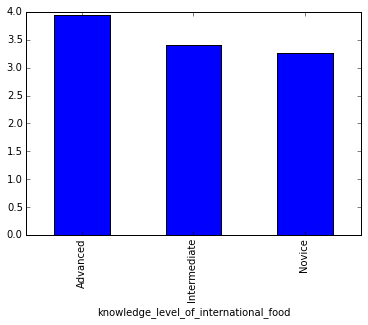

In [4]:
df = data
df = df.groupby(['knowledge_level_of_international_food','gender']).mean()
df = df.unstack(0)
df = df.stack(0)
df1 = df.loc['Male']
df2 = df.loc['Female']
new_df = (df1 + df2)/2
new_df = new_df.drop(('respondent_id'))
new_df.mean().plot(kind = 'bar')

People with a more advanced knowledge give significantly higher grades

In [9]:
df = data
df = df.groupby(['interested_in_international_foods','gender']).size()
df
#df = df.unstack(0)
#df = df.stack(0)
#df1 = df.loc['Male']
#df2 = df.loc['Female'].fillna('0')
#new_df = df1.add(df2, fill_value = 0)
#new_df = new_df.drop(('respondent_id'))
#s = new_df.sum()
#new_df = new_df/s
#new_df.order().plot(kind = 'bar')
#data['interested_in_international_foods'].count()

interested_in_international_foods  gender
A lot                              Female    11
                                   Male      15
Not at all���                      Male       6
Not much���                        Female     6
                                   Male      11
Some                               Female    21
                                   Male      21
dtype: int64

The majority of respondent (80%) has a certain interest in international cuisine

nigeria            2.400000
ivory_coast        2.875000
russia             2.900000
uruguay            2.928571
england            2.975000
average            3.390457
ethiopia           3.714286
the_netherlands    3.720000
united_states      3.782609
mexico             3.953488
italy              4.305882
dtype: float64

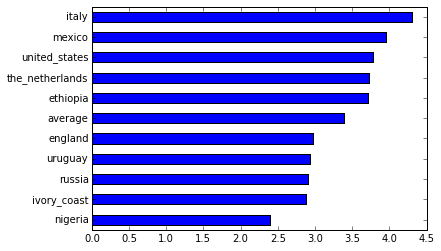

In [50]:
df = data
ave = df.mean().order(ascending = False)
# Dirty trick to remove the respondent ID column
new_ave = ave[1:41]
summary = new_ave.head(5)
mean = pd.Series(new_ave.mean(), index = ['average'])
summary = summary.append(mean)
summary = summary.append(new_ave.tail(5))
summary = summary.order(ascending = True)
summary.plot(kind = 'barh')
summary


In [7]:
df = data
ave = df.mean().order(ascending = False)
# Dirty trick to remove the respondent ID column
new_ave = ave[1:41]
new_ave.tail(5)

england        2.975000
uruguay        2.928571
russia         2.900000
ivory_coast    2.875000
nigeria        2.400000
dtype: float64

The 5 most popular cuisines are Italian, Mexican, USA, Dutch and Ethiopian! The worst are England, Uruguay, Russia, Ivory Coast and Nigeria.

I am really surprised about the Dutch and Ethiopian result! Also, interestingly, France and Spain do not make it in the top 5.

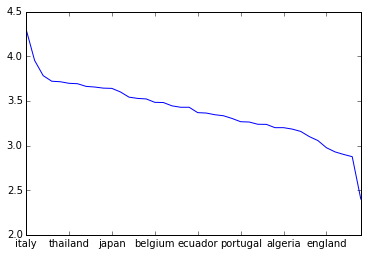

In [117]:
new_ave.plot()

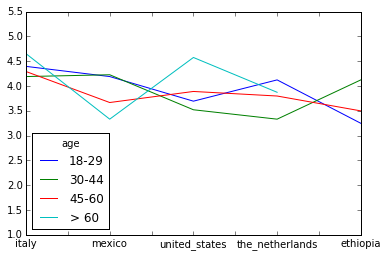

In [401]:
g = df.groupby(['age', 'gender']).mean()
g = g.unstack(0)
g = g.stack(0)
df1 = g.loc['Male']
df2 = g.loc['Female']
new_df = (df1 + df2)/2
new_df = new_df.drop(('respondent_id'))
#new_df.plot(ylim = (1,5.5))
#new_df
new_df.loc[['italy','mexico','united_states','the_netherlands','ethiopia']].plot(ylim = (1,5.5))


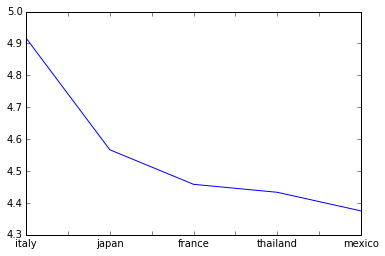

In [502]:
df = data
df = df.groupby(['knowledge_level_of_international_food','gender']).mean()
df = df.unstack(0)
df = df.stack(0)
df1 = df.loc['Male']
df2 = df.loc['Female']
new_df = (df1 + df2)/2
new_df = new_df.drop(('respondent_id'))
#new_df.loc[['italy','mexico','united_states','the_netherlands','ethiopia']]
new_df['Advanced'].order(ascending = False).head(5).plot()
#new_df['Intermediate'].order(ascending = False).head(5).plot()
#new_df['Novice'].order(ascending = False).head(5).plot()
#data.groupby(['knowledge_level_of_international_food', 'ghana']).size()
#data['ghana']

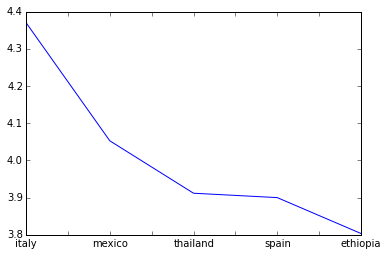

In [503]:
new_df['Intermediate'].order(ascending = False).head(5).plot()

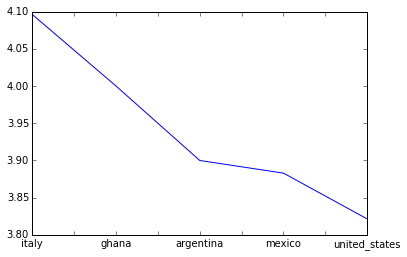

In [504]:
new_df['Novice'].order(ascending = False).head(5).plot()

I am showing the top 5 most popular cuisines for the Advanced, Intermediate and Novice levels. Italian always comes on top

In [410]:
d = data
d= d.groupby(['household_income', 'interested_in_international_foods']).size()
d

household_income     interested_in_international_foods
$0 - $24,999         A lot                                 3
                     Not at all���                         1
                     Not much���                           3
                     Some                                  6
$100,000 - $149,999  A lot                                 2
                     Not much���                           1
                     Some                                  5
$150,000+            A lot                                 5
                     Not at all���                         1
                     Not much���                           2
                     Some                                  3
$25,000 - $49,999    A lot                                 4
                     Not much���                           2
                     Some                                  8
$50,000 - $99,999    A lot                                 9
                     Not at al

Hard to find any strong correlation between income and interest in international foods...

In [415]:
d = data
d= d.groupby(['education', 'interested_in_international_foods']).size()


Also in this case it is hard to find any strong correlation...

In [423]:
d = data
d= d.groupby(['census_region_location'])['china'].mean()
d

census_region_location
East North Central    3.823529
East South Central    4.000000
Middle Atlantic       3.500000
Mountain              3.714286
New England           3.400000
Pacific               3.300000
South Atlantic        3.421053
West North Central    4.333333
West South Central    3.571429
Name: china, dtype: float64

In [507]:
d = data
d= d.groupby(['interested_in_international_foods','knowledge_level_of_international_food']).size()
d

interested_in_international_foods  knowledge_level_of_international_food
A lot                              Advanced                                  9
                                   Intermediate                             13
                                   Novice                                    4
Not at all���                      Novice                                    6
Not much���                        Advanced                                  1
                                   Intermediate                              9
                                   Novice                                   12
Some                               Advanced                                  1
                                   Intermediate                             21
                                   Novice                                   24
dtype: int64

Not surprisingly, people who are very interested in international foods also have a higher knowledge of them and viceversa.


In [521]:
df = data
ser = data.count()#[3:43]
ser = ser
ser.order(ascending = False)

respondent_id                            100
knowledge_level_of_international_food    100
interested_in_international_foods        100
united_states                             92
age                                       91
gender                                    91
education                                 90
census_region_location                    90
mexico                                    86
italy                                     85
china                                     80
england                                   80
france                                    77
germany                                   77
india                                     76
household_income                          75
japan                                     75
greece                                    70
thailand                                  66
spain                                     65
ireland                                   63
cuba                                      46
vietnam   

This is a metric I have come across to show the popularity of certain cuisines. This shows how many people actually knew about a certain food. This can also be used to estimate how reliable certain results are. For instance, when I find that Ghana is the 2nd most popular among Novice people, I also see that only 9 people responded in this case, which makes me doubt about statical validity...

In [55]:
df = data
df.groupby('gender').size()
#df['gender'].isnull().sum()

gender
Female    38
Male      53
dtype: int64